importing necessary libray

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import gdown

function to import  the dataset from google drive 

In [5]:
def download_file(file_id, output):
    """Downloads a file from Google Drive using its file ID."""
    
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output, quiet=False)

function to load the dataset 

In [6]:
def load_data(filepath):
    """Loads data from a CSV file."""
    return pd.read_csv(filepath)

Preprocesses the dataset by cleaning and extracting useful information.

In [7]:
def preprocess_data(df):
    
    df['headline_length'] = df['headline'].str.len()
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.day_name()
    df['headline_clean'] = df['headline'].str.lower().str.replace('[^\w\s]', '', regex=True)
    return df

<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Ghost\AppData\Local\Temp\ipykernel_15204\573409954.py:8: SyntaxWarning: invalid escape sequence '\w'
  df['headline_clean'] = df['headline'].str.lower().str.replace('[^\w\s]', '', regex=True)


Function to Prints basic statistics about the dataset.

In [9]:
def analyze_statistics(df):

    print("Headline Length Statistics:")
    print(df['headline_length'].describe())
    print("\nPublisher Counts:")
    print(df['publisher'].value_counts())

function to  Plots trends in article counts by year, month, and day of the week

In [10]:
def plot_trends(df):
    
    articles_per_year = df['year'].value_counts().sort_index()
    articles_per_month = df['month'].value_counts().sort_index()
    articles_by_day = df['day_of_week'].value_counts()

    plt.figure(figsize=(14, 8))
    plt.subplot(3, 1, 1)
    articles_per_year.plot(kind='bar', color='skyblue')
    plt.title('Articles Per Year')
    plt.subplot(3, 1, 2)
    articles_per_month.plot(kind='bar', color='orange')
    plt.title('Articles Per Month')
    plt.subplot(3, 1, 3)
    articles_by_day.plot(kind='bar', color='green')
    plt.title('Articles By Day of the Week')
    plt.tight_layout()
    plt.show()

function to Analyzes and categorizes the sentiment of headlines

In [ ]:
def analyze_sentiments(df):
    
    def get_sentiment(text):
        analysis = TextBlob(text)
        return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

    df['sentiment'] = df['headline'].apply(get_sentiment)
    print("\nSentiment Counts:")
    print(df['sentiment'].value_counts())


function to Performs topic modeling on the dataset headlines.

In [12]:
def topic_modeling(df, n_topics=5):
    
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(df['headline'].dropna())
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(doc_term_matrix)

    words = vectorizer.get_feature_names_out()
    print("\nTopics:")
    for idx, topic in enumerate(lda_model.components_):
        print(f"Topic {idx + 1}:")
        print([words[i] for i in topic.argsort()[-10:]])

Function to Plots publication trends over time.

In [13]:
def plot_publication_trends(df):
    
    df['date_only'] = df['date'].dt.date
    daily_publications = df.groupby('date_only').size()

    plt.figure(figsize=(12, 6))
    daily_publications.plot()
    plt.title("Article Publication Frequency Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45)
    plt.show()


function to Analyzes publishers and plots the top 10 publishers by article count.

In [15]:
def analyze_publishers(df):
    
    publisher_counts = df['publisher'].value_counts()

    plt.figure(figsize=(12, 6))
    publisher_counts.head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Publishers by Number of Articles")
    plt.xlabel("Publisher")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Assinging variable 

In [17]:
file_id = '1ppoKHB4x3ISTZQk1LOmkFTyUDO1b4gzZ'
output_file = 'raw_analyst.csv'


Step 1: Download the file


 Download the dataset

In [20]:

download_file(file_id, output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1ppoKHB4x3ISTZQk1LOmkFTyUDO1b4gzZ
From (redirected): https://drive.google.com/uc?id=1ppoKHB4x3ISTZQk1LOmkFTyUDO1b4gzZ&confirm=t&uuid=4c3cf426-4908-4826-bd64-550ec8718877
To: c:\Users\Ghost\Desktop\Week1\notebooks\raw_analyst.csv
100%|██████████| 328M/328M [16:10<00:00, 338kB/s]  


loading the Load data set

In [22]:
df = load_data(output_file)

Preprocess data

In [23]:
df = preprocess_data(df)

Analyze statistics

In [24]:
analyze_statistics(df)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Publisher Counts:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


Plot trends

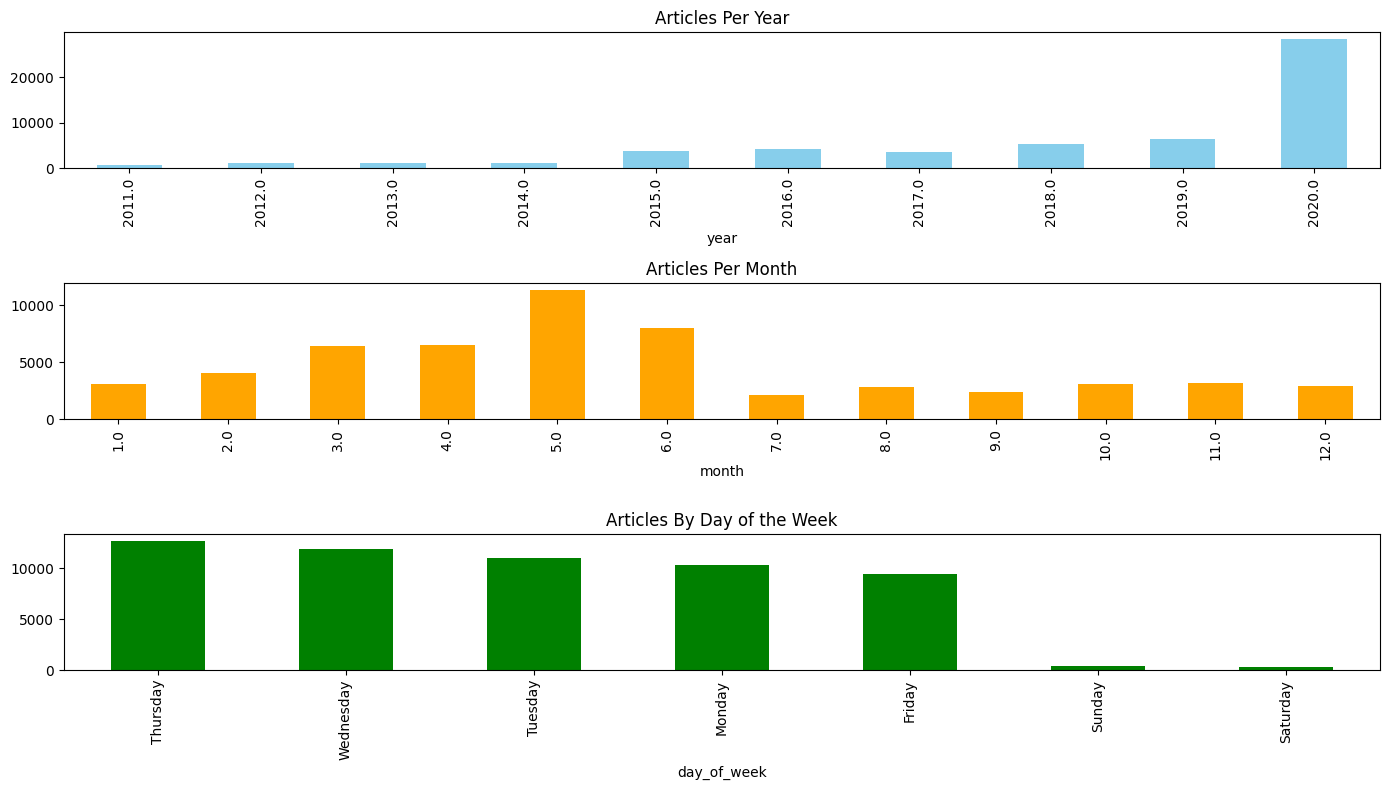

In [25]:
plot_trends(df)

Analyze sentiments

In [27]:
def analyze_sentiments(df):
    """Analyzes and categorizes the sentiment of headlines."""
    from textblob import TextBlob

    def get_sentiment(text):
        analysis = TextBlob(text)
        return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

    df['sentiment'] = df['headline'].apply(get_sentiment)
    print("\nSentiment Counts:")
    print(df['sentiment'].value_counts())

In [28]:
analyze_sentiments(df)


Sentiment Counts:
sentiment
Neutral     934928
Positive    341161
Negative    131239
Name: count, dtype: int64


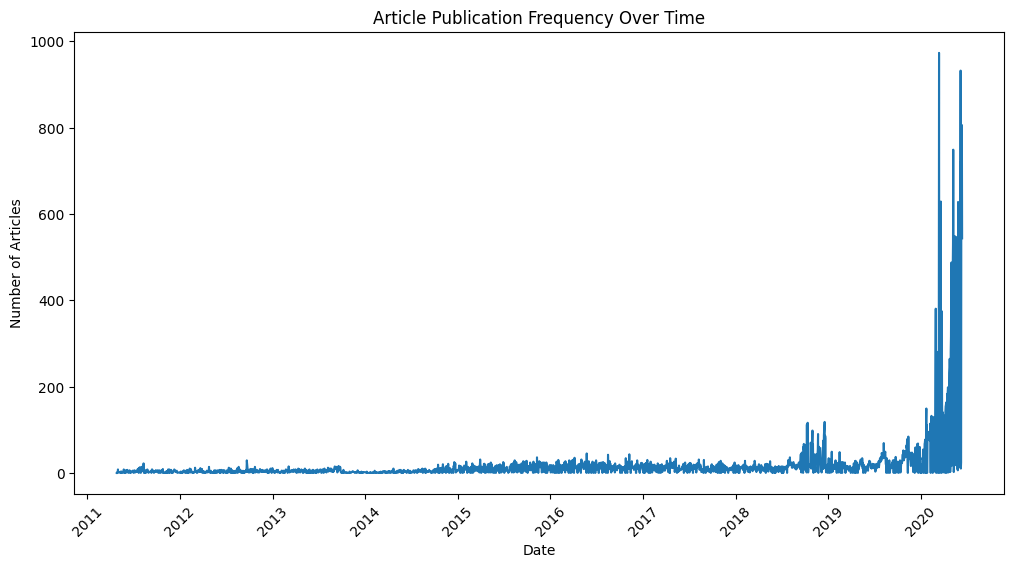

In [29]:
plot_publication_trends(df)

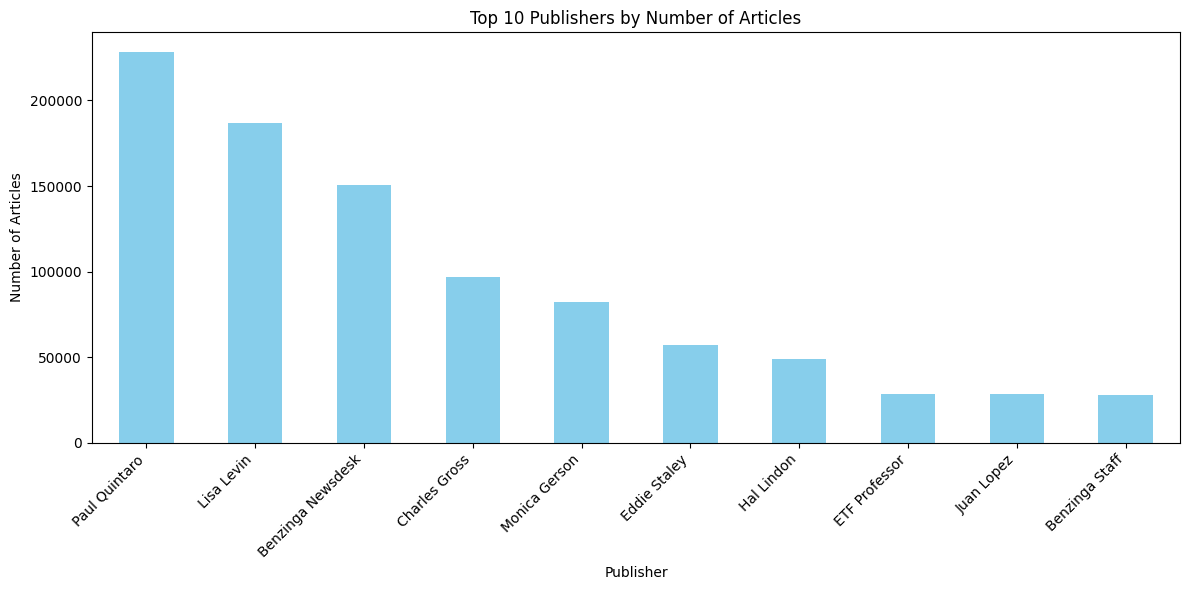

In [30]:
analyze_publishers(df)

In [2]:
import talib
print(talib.__version__)  # Displays the installed version
print(talib.get_functions())  # Lists all available TA-Lib functions

0.5.1
['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJI